# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [4]:
import pandas as pd

# Load the Pokémon dataset
pokemon_data =  pd.read_csv('pokemon.csv')

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [6]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data['sp_attack_to_sp_defense_ratio'] = pokemon_data['sp_attack'] / pokemon_data['sp_defense']

# Select all features + derived  
# target: Legendary 
features = ['attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'total_bs',
            'capture_rt', 'sp_attack_to_sp_defense_ratio', 'type']
target = ['legendary']

X = pokemon_data[features] 
y = pokemon_data[target] 

### 2.2 Data Transformation Using ColumnTransformer

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, Normalizer, MaxAbsScaler 


# Categorical and numerical columns
categorical_features = ['type']
numeric_features = [col for col in features if col not in categorical_features]

# Preprocessing pipeline
# please choose one suitable method as your scaling method
# please use OneHot as your Encoder
max_abs_scaler = MaxAbsScaler()
numeric_transformer =  max_abs_scaler 
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('pokemon', categorical_transformer, categorical_features)
    ]
)

preprocessor

ColumnTransformer(transformers=[('num', MaxAbsScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'total_bs',
                                  'capture_rt',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('pokemon', OneHotEncoder(), ['type'])])

### Prepare the training data

In [12]:
from sklearn.model_selection import train_test_split

# Transform the data
X_transformed = preprocessor.fit_transform(X)

# Train-test split
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split
X_train, X_temp, y_train, y_temp = train_test_split(
    X_transformed, y, test_size=0.3, random_state=42, stratify=y
)

In [13]:
# Your import 

# Please use train_test_split to prepare your data
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

#Print your X_train and X_test
X_train[:2], X_test[:2]

(array([[0.35135135, 0.2826087 , 0.20618557, 0.17391304, 0.08333333,
         0.40384615, 0.74509804, 0.27007299, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         1.        ],
        [0.45405405, 0.30434783, 0.33505155, 0.30434783, 0.28333333,
         0.52564103, 0.17647059, 0.25078206, 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 1.        , 0.        ,
         0.        ]]),
 array([[0.51351351, 0.36956522, 0.56701031, 0.41304348, 0.43888889,
         0.68589744, 0.17647059, 0.3127161 , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

## Step 3: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=300, random_state=42)
logistic_model.fit(X_train, y_train)


# Train Logistic Regression
y_val_prob_logistic = logistic_model.predict_proba(X_val)[:, 1]
auc_val_logistic = roc_auc_score(y_val, y_val_prob_logistic) # AUC

y_val_pred_logistic = logistic_model.predict(X_val)
accuracy_score_logistic = accuracy_score(y_val, y_val_pred_logistic) # Accuracy

# By trying different methods, your accuracy can reach over 90%.






print("Ajeje + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Ajeje + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       110
           1       0.83      0.50      0.62        10

    accuracy                           0.95       120
   macro avg       0.89      0.75      0.80       120
weighted avg       0.95      0.95      0.94       120

Validation AUC: 0.9855
Validation accuracy: 0.9500


C:\Users\ssale\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Step 4: Multi-Layer Perceptron (MLP)

In [17]:
from sklearn.neural_network import MLPClassifier

# Build your Multi-Layer Perceptron model
# Train MLP Classifier
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
mlp_model = MLPClassifier(hidden_layer_sizes=(8, 4), activation='relu', max_iter=500, random_state=42)
mlp_model.fit(X_train, y_train)

# Evaluate MLP Classifier
# Please use AUC and accuracy score to evalue your model
y_val_pred_mlp = mlp_model.predict(X_val)
accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)

y_val_prob_mlp = mlp_model.predict_proba(X_val)[:, 1]
auc_val_mlp = roc_auc_score(y_val, y_val_prob_mlp)

print("Ajeje + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

C:\Users\ssale\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1105: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Ajeje + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       110
           1       0.82      0.90      0.86        10

    accuracy                           0.97       120
   macro avg       0.90      0.94      0.92       120
weighted avg       0.98      0.97      0.98       120

Validation AUC: 0.9873
Validation accuracy: 0.9750


C:\Users\ssale\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
# Please record your loss of logistic regression with 500 iterations
# Initialize the model with warm_start to fit incrementally
logreg = LogisticRegression(max_iter=1, warm_start=True, solver='lbfgs')

# To store the loss values
loss_curve = []

# Train the model incrementally
for i in range(500):
    logreg.fit(X_train, y_train)  # Fit the model for one iteration at a time
    # Predict the probabilities for log_loss calculation
    y_pred = logreg.predict_proba(X)
    # Calculate the log loss for the current iteration and append it to the loss_curve
    loss = log_loss(y_train, y_pred)
    loss_curve.append(loss)



C:\Users\ssale\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ssale\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ssale\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


ValueError: could not convert string to float: 'grass'

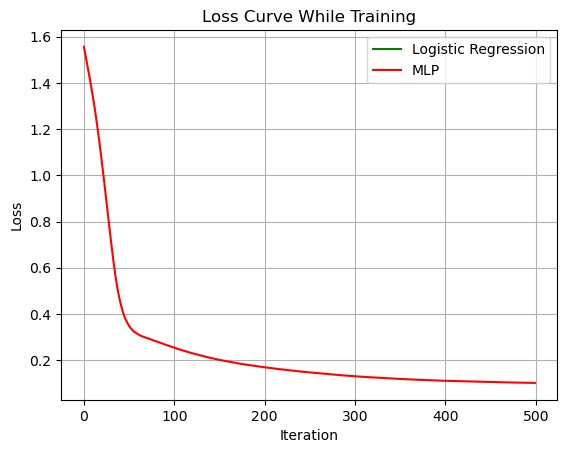

In [24]:
# Extract loss during MLP training
mlp_model_loss_curve = mlp_model.loss_curve_
Logic_loss = loss_curve
 

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
plt.plot(loss_curve, label='Logistic Regression', color='green')
plt.plot(mlp_model_loss_curve, label='MLP', color='red')
plt.title('Loss Curve While Training')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



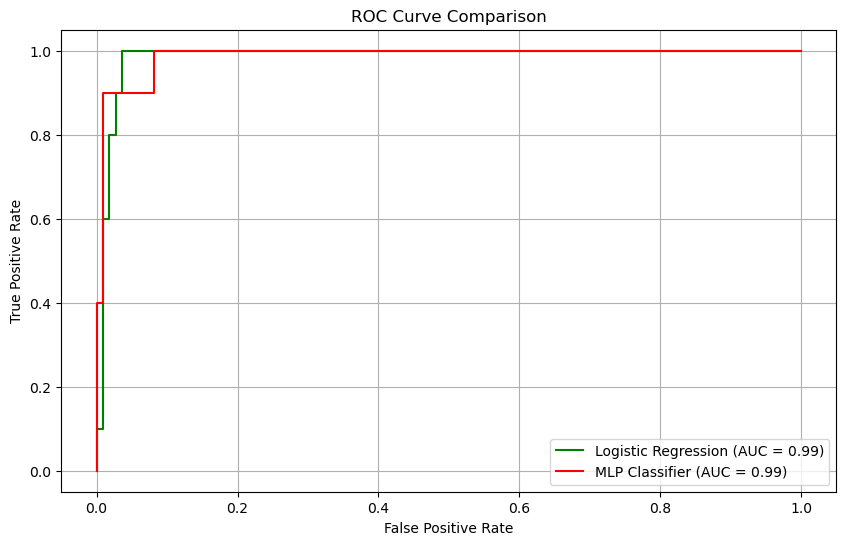

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison


# Plot ROC curves
fpr_logistic, tpr_logistic, _ = roc_curve(y_val, y_val_prob_logistic)
fpr_mlp, tpr_mlp, _ = roc_curve(y_val, y_val_prob_mlp)

plt.figure(figsize=(10, 6))
plt.plot(fpr_logistic, tpr_logistic, color='green', label=f"Logistic Regression (AUC = {auc_val_logistic:.2f})")
plt.plot(fpr_mlp, tpr_mlp, color='red', label=f"MLP Classifier (AUC = {auc_val_mlp:.2f})")
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [28]:
# Your idea:
# Judging by theAUC-ROC curve is hard to tell. The models perform differently at different levels. 
# In general it makes sense that logistic regression models need better trained data and MLP models can perform on more complex data sets 


## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

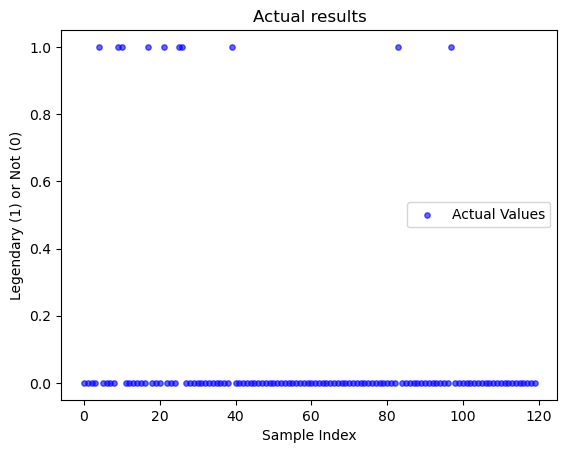

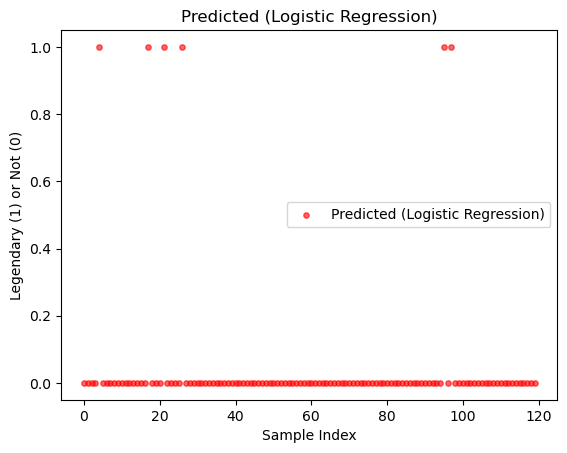

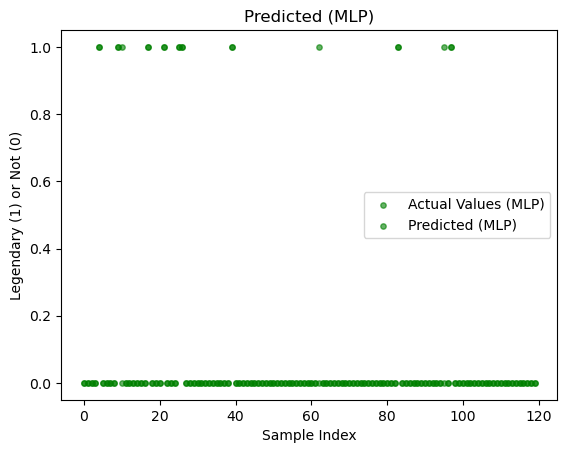

In [32]:
# Please plot the Actual data and Predicted for Logistic and MLP model

#Actual Log
plt.scatter(range(len(y_val)), y_val, color='blue', alpha=0.6, label="Actual Values", s=15)
plt.title("Actual results")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

#Predicted Log
plt.scatter(range(len(y_val)), y_val_pred_logistic, color='red', alpha=0.6, label="Predicted (Logistic Regression)", s=15)
plt.title("Predicted (Logistic Regression)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()
plt.show()

#Actual MLP
plt.scatter(range(len(y_val)), y_val, color='green', alpha=0.6, label="Actual Values (MLP)", s=15)
plt.title("Actual (MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()



#Predicted MLP
plt.scatter(range(len(y_val)), y_val_pred_mlp, color='green', alpha=0.6, label="Predicted (MLP)", s=15)
plt.title("Predicted (MLP)")
plt.xlabel("Sample Index")
plt.ylabel("Legendary (1) or Not (0)")
plt.legend()

### Confusion Matrices

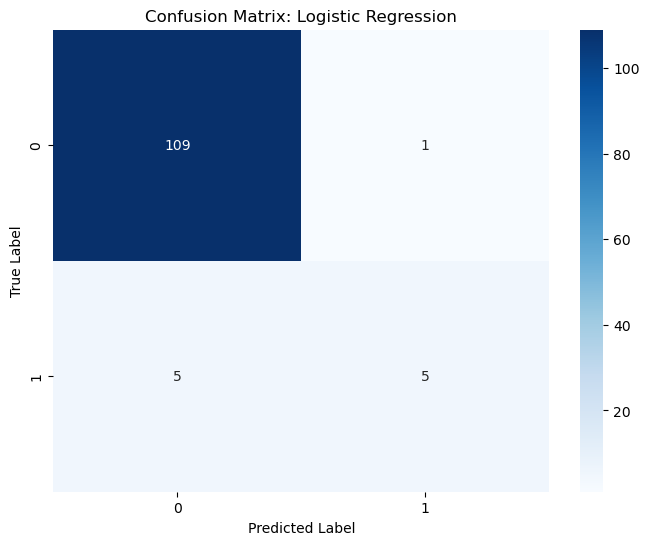

In [35]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
cm_logistic = confusion_matrix(y_val, y_val_pred_logistic)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

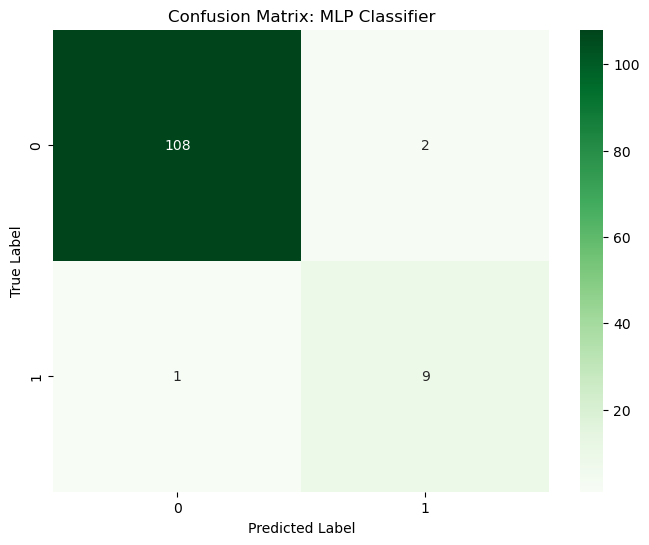

In [37]:
# plot MLP
cm_mlp = confusion_matrix(y_val, y_val_pred_mlp)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix: MLP Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## Conclusion

In [39]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea : The models performed at similar levels, both very precise on positives, few falses. Meaning both models falsy categorised few pokemons.
# I wonder where would one even begin improving these models since there seem to be few flaws and that they don't exactly make a pattern. 
# Maybe chang the .csv file to some other file with the same structure(R, C), and values. 
